# Chapter 6 - A Numerical Tour

This notebook reproduces some of the figures in Chapter 6 of the thesis.

## Preamble

*Important*: Make sure to replace the string in the cell below with the path to your local copy of the GSSR repository.

In [6]:
cmd_folder = '../../gssr' # Insert here the string pointing to the gssr root folder

# Make sure the gssr folder is in the python path
import os, sys
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

# Import the needed gssr modules
import utils
import plotting
from plotting import plot_graph
    
import graphs_signals as gs

Now we can import the rest of the Python modules needed for this notebook.

In [13]:
from glob import glob, iglob

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('thesis.mplstyle')
%matplotlib inline

import helper
helper.set_pgf_preamble()

The next cell sets the path to the experiment data, the path to the save folder, and loads the EPFL color palette.

In [14]:
experiment_path = '../data/curated/'
save_path = '../latex/images/'
epfl_colors = utils.load_obj('epfl_colors_hex.pkl')

## 1. Stochastic Block Model (SBM) figures

### 1.1. Unbalanced 2-SBM

The first plot is a balanced, 2-community SBM graph draw. The plotted signal is the indicator vector of the leftmost community.

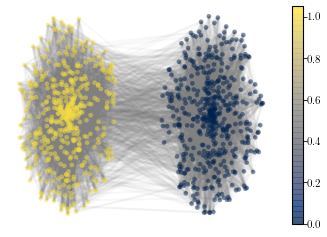

In [15]:
fn = "pt_2ssbm_unif_samp_tv_interp.pkl"
experiment = utils.load_obj(os.path.join(experiment_path, fn))

n_vertices = experiment['n_vertices']
n_communities = experiment['n_communities']
a = np.median(experiment['rows'])
b = experiment['b']

graph, indicator_vectors = gs.ssbm(n_vertices, n_communities, a=a, b=b)

fig, ax = plt.subplots(1)
helper.set_cmap('signal')
plotting.plot_graph(graph, indicator_vectors[0,:], ax=ax, colorbar=True, edges=True)
#ax.set(title='SSBM({0}, {1}, {2:.1f}, {3:.1f})'.format(n_vertices, n_communities, a, b))
plt.savefig(save_path + '2ssbm.pdf')
plt.show()

Next, we plot the phase transition of the recovery error for the 2-SSBM using uniform sampling and Graph Total-Variation (G-TV) recovery. 

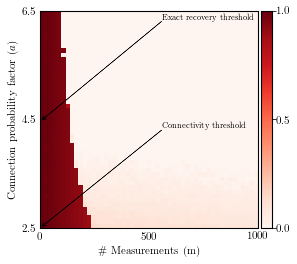

In [16]:
helper.set_cmap() # Reset to default colormap
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=True)
plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_interp_with_thresholds.pdf')
plt.show()

The next figure repeats the previous plot, but quantizes the colors to highlight the error level sets.

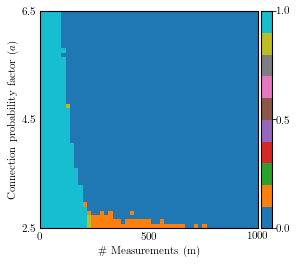

In [17]:
helper.set_cmap('quantized')
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_interp_quantized.pdf')
plt.show()

### 1.2. 2-SSBM

Now, we show a plot of a balanced, 2-community SBM draw. The graph signal is the indicator vector of the leftmost community.

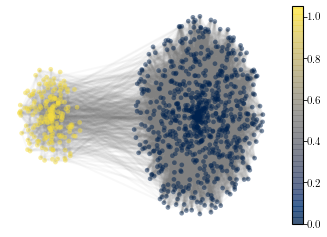

In [18]:
fn = "pt_2sbm_unif_samp_tv_interp.pkl"
experiment = utils.load_obj(os.path.join(experiment_path, fn))

n_vertices = experiment['n_vertices']
n_communities = experiment['n_communities']
n_vert_per_comm = experiment['n_vertices_per_community']
a = np.median(experiment['rows'])
b = experiment['b']

graph, indicator_vectors = gs.sbm(n_vertices, 
                                  n_communities=n_communities,
                                  n_vert_per_comm=n_vert_per_comm, 
                                  intra_comm_prob=a * np.log(n_vertices) / n_vertices,
                                  inter_comm_prob=b * np.log(n_vertices) / n_vertices)


fig, ax = plt.subplots(1)
helper.set_cmap('signal')
plotting.plot_graph(graph, indicator_vectors[0,:], ax=ax, colorbar=True, edges=True)
#ax.set(title='2-SBM({0}, {1}, {2:.1f}, {3:.1f})'.format(n_vertices, n_communities, a, b))
plt.savefig(save_path + '2sbm.pdf')
plt.show()

Analogously to the unbalanced case, we display in the next two figures a phase transition plot and its quantized versions for the 2-SSBM. The vertex sampling is unifom at random and the recovery is done by G-TV decoder.

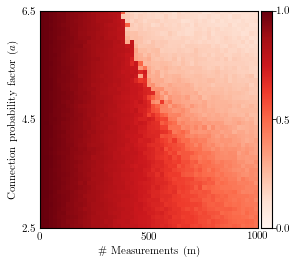

In [19]:
helper.set_cmap() # Reset to default colormap
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_interp.pdf')
plt.show()

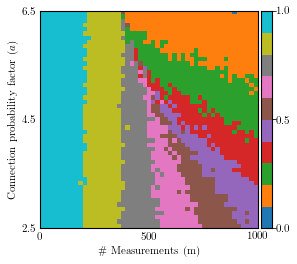

In [20]:
helper.set_cmap('quantized')
helper.plot_sbm_pt(experiment, ax=None, with_colorbar=True, with_thresholds=False)
plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_interp_quantized.pdf')
plt.show()

## 2. G-TV vs. Dirichlet interpolation for uniform sampling

This section contains plots comparing the effects of using a Dirichlet form or G-TV decoder when recovering piecewise-constant graph signals. The vertex sampling design is fixed as uniform at random.

### 2.1. 2-SSBM

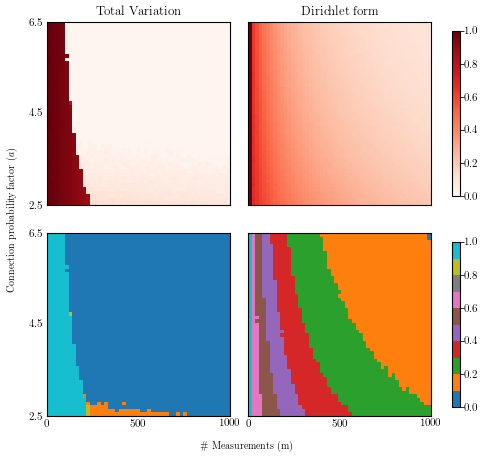

In [21]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
list_a = tv_experiment['rows']
a = np.median(list_a)
b = tv_experiment['b']

n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.1, 'wspace':0.1})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(tv_experiment, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Total Variation', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Dirichlet form', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(tv_experiment, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.02)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.02)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.07, '\# Measurements (m)', ha='center')

plt.savefig(save_path + 'pt_2ssbm_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

### 2.2. Unbalanced 2-SBM

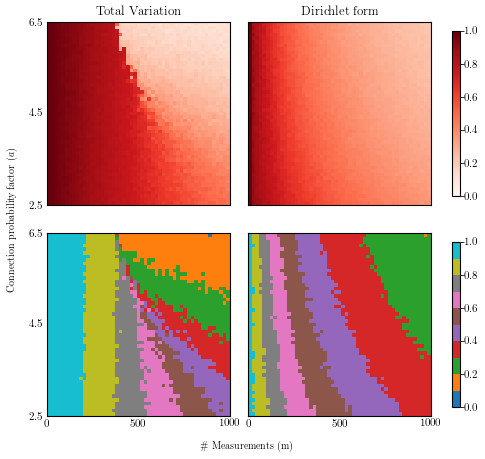

In [22]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
list_a = tv_experiment['rows']
a = np.median(list_a)
b = tv_experiment['b']

n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.1, 'wspace':0.1})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(tv_experiment, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Total Variation', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Dirichlet form', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(tv_experiment, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(dirichlet_experiment, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.02)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.02)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.07, '\# Measurements (m)', ha='center')

plt.savefig(save_path + 'pt_2sbm_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

### 2.3. `email-EU-core`

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


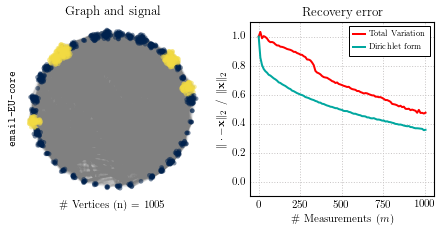

In [23]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
gt_signal = tv_experiment['gt_signal']
list_m = tv_experiment['cols']

graph, _ = gs.email_eu_core(path=os.path.join(cmd_folder, 'data/email-EU-core/'))

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
helper.set_cmap('signal')
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{email-EU-core}')

# Plot curves
helper.plot_line_pt(tv_experiment, 
                    ax=ax[1],
                    label='Total Variation', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

helper.plot_line_pt(dirichlet_experiment, 
                    ax=ax[1],
                    label='Dirichlet form', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

ax[1].legend()
ax[1].set(title="Recovery error", 
          ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_email_eu_core_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

### 2.4. `swiss-national-council`

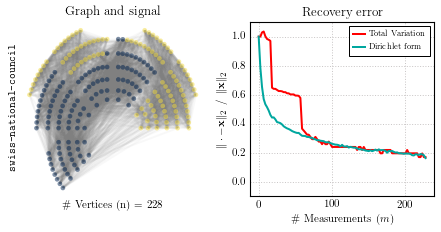

In [25]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_dirichlet_interp.pkl"))

n_vertices = tv_experiment['n_vertices']
n_communities = tv_experiment['n_communities']
gt_signal = tv_experiment['gt_signal']
list_m = tv_experiment['cols']

graph, _ = gs.swiss_national_council(path=os.path.join(cmd_folder, 'data/swiss-national-council/'),
                                     **tv_experiment['nn_params'])

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
helper.set_cmap('signal')
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{swiss-national-council}')

# Plot curves
helper.plot_line_pt(tv_experiment, 
                    ax=ax[1],
                    label='Total Variation', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

helper.plot_line_pt(dirichlet_experiment, 
                    ax=ax[1],
                    label='Dirichlet form', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

ax[1].legend()
ax[1].set(title="Recovery error", 
          ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_snc_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

### 2.5. `BSDS300`

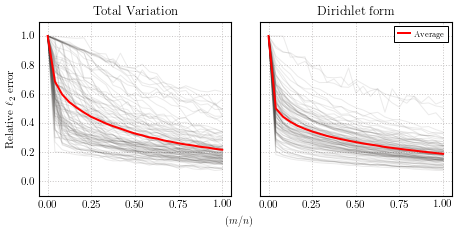

In [26]:
tv_experiment = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_tv_interp.pkl"))
dirichlet_experiment = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_dirichlet_interp.pkl"))

graph_type = tv_experiment['graph_type']
ids = tv_experiment['rows']
list_m = tv_experiment['cols']

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

for i in np.arange(len(ids)):
    ax[0].plot(list_m, tv_experiment['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[1].plot(list_m, dirichlet_experiment['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    
# Highlight the averages 
ax[0].plot(list_m, np.mean(tv_experiment['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[1].plot(list_m, np.mean(dirichlet_experiment['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)

ax[0].set(title='Total Variation', xlabel='', ylabel=r'Relative $\ell_2$ error')
ax[1].set(title='Dirichlet form', xlabel='')

ax[0].set_ylim(bottom=-0.1, top=1.1)
ax[1].set_ylim(bottom=-0.1, top=1.1)

ax[1].legend()

# Add axes labels
fig.text(0.5, 0.0, r'$(m/n)$', ha='center')

plt.savefig(save_path + 'pt_bsds300_unif_samp_tv_vs_dirichlet.pdf')

plt.show()

## 3. Effect of sampling design on the phase transitions using G-TV decoder

This final section draws plots comparing the phase transition plots induced by using the uniform, naive coherence, or jump-set coherence sampling. The recovery is always done by the G-TV decoder.

### 3.1. 2-SSBM

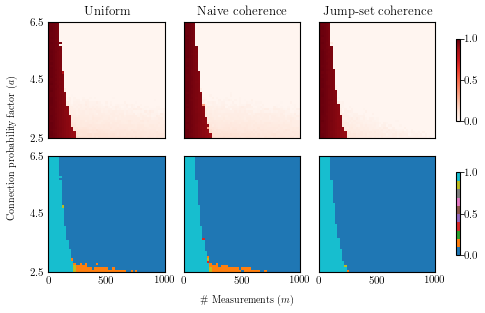

In [27]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2ssbm_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
list_a = unif_samp_tv_interp['rows']
a = np.median(list_a)
b = unif_samp_tv_interp['b']

n_rows = 2
n_cols = 3
figsize = (7.4, 4.6)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Uniform', xlabel='', ylabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Naive coherence', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[0,2], with_colorbar=False)
ax[0,2].set(title='Jump-set coherence', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[1,2], with_colorbar=False)
ax[1,2].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.01)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.01)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.03, r'\# Measurements ($m$)', ha='center')

plt.savefig(save_path + 'pt_2ssbm_tv_interp.pdf')

plt.show()

### 3.2. Unbalanced 2-SBM 

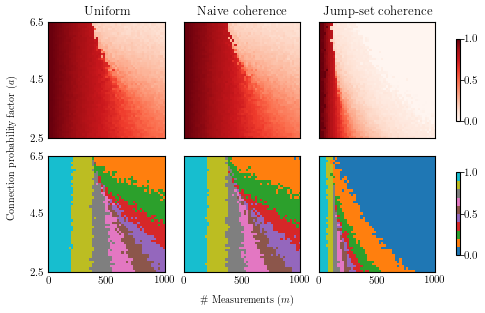

In [28]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_2sbm_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
list_a = unif_samp_tv_interp['rows']
a = np.median(list_a)
b = unif_samp_tv_interp['b']

n_rows = 2
n_cols = 3
figsize = (7.4, 4.6)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

# Plot phase transitions

helper.set_cmap() # Reset to default colormap

helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[0,0], with_colorbar=False)
ax[0,0].set(title='Uniform', xlabel='', ylabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[0,1], with_colorbar=False)
ax[0,1].set(title='Naive coherence', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[0,2], with_colorbar=False)
ax[0,2].set(title='Jump-set coherence', ylabel='', xlabel='')

helper.set_cmap('quantized') # Set quantized colormap
 
helper.plot_sbm_pt(unif_samp_tv_interp, ax=ax[1,0], with_colorbar=False)
ax[1,0].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(naive_coherence_samp_tv_interp, ax=ax[1,1], with_colorbar=False)
ax[1,1].set(title='', ylabel='', xlabel='')

helper.plot_sbm_pt(jump_set_coherence_samp_tv_interp, ax=ax[1,2], with_colorbar=False)
ax[1,2].set(title='', ylabel='', xlabel='')

# Add colorbars
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='Reds')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
                  ax=ax[0,:],
                  fraction=0.01)

norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False)
cmap = mpl.cm.get_cmap(name='tab10')
cb = plt.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                  ax=ax[1,:],
                  fraction=0.01)

# Add axes labels
fig.text(0.05, 0.5, r'Connection probability factor ($a$)', va='center', rotation='vertical')
fig.text(0.5, 0.03, r'\# Measurements ($m$)', ha='center')

plt.savefig(save_path + 'pt_2sbm_tv_interp.pdf')

plt.show()

### 3.3. `email-EU-core`

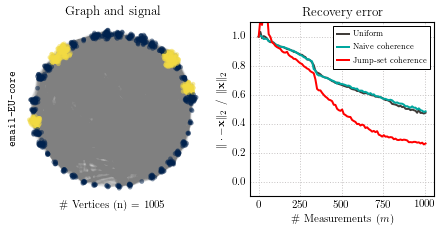

In [29]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_unif_samp_tv_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_email_eu_core_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
gt_signal = unif_samp_tv_interp['gt_signal']
list_m = unif_samp_tv_interp['cols']

graph, _ = gs.email_eu_core(path=os.path.join(cmd_folder, 'data/email-EU-core/'))

n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

helper.set_cmap('signal')
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{email-EU-core}')

# Plot curves
helper.plot_line_pt(unif_samp_tv_interp, 
                    ax=ax[1],
                    label='Uniform', 
                    linewidth=2, 
                    color=epfl_colors['ardoise'])

helper.plot_line_pt(naive_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Naive coherence', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

helper.plot_line_pt(jump_set_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Jump-set coherence', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

ax[1].legend()
ax[1].set(title="Recovery error", ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_email_eu_core_tv_interp.pdf')

plt.show()

### 3.4. `swiss-national-council`

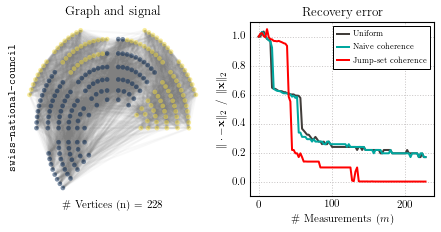

In [30]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_tv_interp.pkl"))
unif_samp_dirichlet_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_unif_samp_dirichlet_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_snc_jump_set_coherence_samp_tv_interp.pkl"))

n_vertices = unif_samp_tv_interp['n_vertices']
n_communities = unif_samp_tv_interp['n_communities']
gt_signal = unif_samp_tv_interp['gt_signal']
list_m = unif_samp_tv_interp['cols']
nn_params = unif_samp_tv_interp['nn_params']

graph, _ = gs.swiss_national_council(path=os.path.join(cmd_folder, 'data/swiss-national-council/'),
                                     **nn_params)
n_rows = 1
n_cols = 2
figsize = (7.4, 3.2)

helper.set_cmap('signal')
fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.25})

# Plot graph
plotting.plot_graph(graph, gt_signal, ax=ax[0], edges=True, colorbar=False)
ax[0].set(title='Graph and signal', 
          xlabel='\# Vertices (n) = {0}'.format(n_vertices), 
          ylabel=r'\texttt{swiss-national-council}')

# Plot curves
helper.plot_line_pt(unif_samp_tv_interp, 
                    ax=ax[1],
                    label='Uniform', 
                    linewidth=2, 
                    color=epfl_colors['ardoise'])

helper.plot_line_pt(naive_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Naive coherence', 
                    linewidth=2, 
                    color=epfl_colors['leman'])

helper.plot_line_pt(jump_set_coherence_samp_tv_interp, 
                    ax=ax[1],
                    label='Jump-set coherence', 
                    linewidth=2, 
                    color=epfl_colors['rouge'])

ax[1].legend()
ax[1].set(title="Recovery error", ylabel=r'$\|\cdot - \mathbf{x}\|_2 \enspace / \enspace \|\mathbf{x}\|_2$')

plt.savefig(save_path + 'pt_snc_tv_interp.pdf')

plt.show()

### 3.5. `BSDS300`

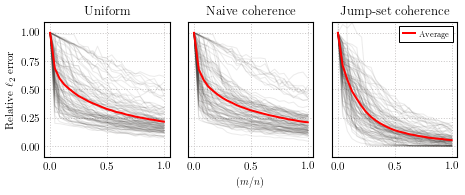

In [33]:
unif_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_tv_interp.pkl"))
unif_samp_dirichlet_interp = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_unif_samp_dirichlet_interp.pkl"))
naive_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_naive_coherence_samp_tv_interp.pkl"))
jump_set_coherence_samp_tv_interp = utils.load_obj(os.path.join(experiment_path, "pt_bsds300_jump_set_coherence_samp_tv_interp.pkl"))

graph_type = unif_samp_tv_interp['graph_type']
ids = unif_samp_tv_interp['rows']
list_m = unif_samp_tv_interp['cols']

n_rows = 1
n_cols = 3
figsize = (7.4, 2.5)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.15, 'wspace':0.15})

for i in np.arange(len(ids)):
    ax[0].plot(list_m, unif_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[1].plot(list_m, naive_coherence_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    ax[2].plot(list_m, jump_set_coherence_samp_tv_interp['grid'][i, :], marker='', color=epfl_colors['ardoise'], linewidth=1, alpha=0.1)
    
# Highlight the averages 
ax[0].plot(list_m, np.mean(unif_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[1].plot(list_m, np.mean(naive_coherence_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)
ax[2].plot(list_m, np.mean(jump_set_coherence_samp_tv_interp['grid'], axis=0), label='Average', marker='', color=epfl_colors['rouge'], linewidth=2)

ax[0].set(title='Uniform', xlabel='', ylabel=r'Relative $\ell_2$ error')
ax[1].set(title='Naive coherence', xlabel='')
ax[2].set(title='Jump-set coherence', xlabel='')

ax[0].set_ylim(bottom=-0.1, top=1.1)
ax[1].set_ylim(bottom=-0.1, top=1.1)
ax[2].set_ylim(bottom=-0.1, top=1.1)

ax[2].legend()

# Add axes labels
fig.text(0.51, -0.03, r'$(m/n)$', ha='center')

plt.savefig(save_path + 'pt_bsds300_tv_interp.pdf')

plt.show()

The next cell works to get the images and respective graphs corresponding to the smallest and largest recovery errors for $m/n = 1.0$ in the jump-set coherence plot above.

In [34]:
# Get image ids with smallest and largest recovery errors

idx_min = ids[np.argmin(jump_set_coherence_samp_tv_interp['grid'][:,-1])]
idx_max = ids[np.argmax(jump_set_coherence_samp_tv_interp['grid'][:,-1])]

from glob import glob, iglob

img_file_min = glob(os.path.join(cmd_folder, 'data/BSDS300/images/**/' + idx_min +'.jpg'), recursive=True)[0]
img_min = plt.imread(img_file_min)

img_file_max = glob(os.path.join(cmd_folder, 'data/BSDS300/images/**/' + idx_max +'.jpg'), recursive=True)[0]
img_max = plt.imread(img_file_max)

graph_min, _ = gs.bsds300(img_id=idx_min, 
                          path=os.path.join(cmd_folder, 'data/BSDS300/'),
                          graph_type=tv_experiment['graph_type'],
                          k=3, 
                          use_flann=True)

gt_signal_min = graph_min.info['node_com']

graph_max, _ = gs.bsds300(img_id=idx_max, 
                          path=os.path.join(cmd_folder, 'data/BSDS300/'),
                          graph_type=tv_experiment['graph_type'],
                          k=3, 
                          use_flann=True)

gt_signal_max = graph_max.info['node_com']

Finally, we plot those images and graphs

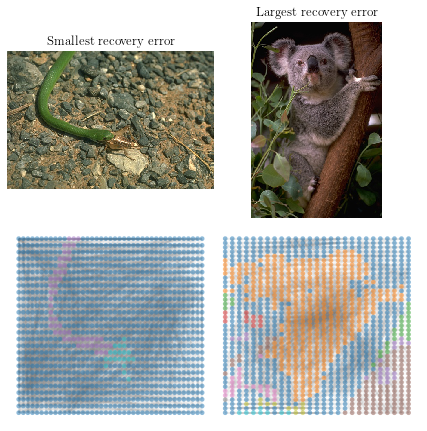

In [35]:
n_rows = 2
n_cols = 2
figsize = (7.4, 7.4)

fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize,
                       gridspec_kw={'hspace': 0.05, 'wspace':0.0})

helper.set_cmap('quantized')
ax[0,0].imshow(img_min, origin='upper')
ax[0,0].axis(False)
plotting.plot_graph(graph_min, gt_signal_min, ax=ax[1,0], colorbar=False)
ax[0,0].set(title='Smallest recovery error')

ax[0,1].imshow(img_max, origin='upper')
ax[0,1].axis(False)
plotting.plot_graph(graph_max, gt_signal_max, ax=ax[1,1], colorbar=False)
ax[0,1].set(title='Largest recovery error')

plt.savefig(save_path + 'bsds300_imgs_smallest_largest_error.pdf')

plt.show()